### Data Dictionary 
- date time (object): Represents the date and time of the intrusion event in "MM/DD/YY HH:MM" format
- host (object): The identifier of the host system where the intrusion event occurred
- src (int64): A unique code representing the source of the data intrusion
- proto (object): The communication protocol used in the intrusion event, such as TCP or UDP
- type (float64): Additional information or categorization of the intrusion event
- spt (float64): The source port number used by the intruder
- dpt (float64): The destination port number on the host where the intrusion occurred
- srcstr (object): The source IP address of the intrusion
- cc (object): The country code representing the country of the source 
- country (object): The name of the country associated with the source address.
- locale (object): A more specific location within the country, such as a city or region.
- localeabbr (object): An abbreviation for the locale
- postalcode (object): The postal code or ZIP code for the source address.
- latitude (float64): The latitude coordinate for the source address.
- longitude (float64): The longitude coordinate for the source address.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("../data/raw/AWS_Honeypot_marx-geo.csv")

#### Data Type Exploration
- Understanding more about our data using some statistical approaches and beginning to uncover errors or missing values that need to be addressed 

In [3]:
df.head(5)

,datetime,host,src,proto,type,spt,dpt,srcstr,cc,country,locale,localeabbr,postalcode,latitude,longitude,Unnamed: 15
0,3/3/13 21:53,groucho-oregon,1032051418,TCP,NaN,6000.0,1433.0,61.131.218.218,CN,China,Jiangxi Sheng,36,NaN,28.5500,115.9333,NaN
1,3/3/13 21:57,groucho-oregon,1347834426,UDP,NaN,5270.0,5060.0,80.86.82.58,DE,Germany,NaN,NaN,NaN,51.0000,9.0000,NaN
2,3/3/13 21:58,groucho-oregon,2947856490,TCP,NaN,2489.0,1080.0,175.180.184.106,TW,Taiwan,Taipei,NaN,NaN,25.0392,121.5250,NaN
3,3/3/13 21:58,groucho-us-east,841842716,UDP,NaN,43235.0,1900.0,50.45.128.28,US,United States,Oregon,OR,97124,45.5848,-122.9117,NaN
4,3/3/13 21:58,groucho-singapore,3587648279,TCP,NaN,56577.0,80.0,213.215.43.23,FR,France,NaN,NaN,NaN,48.8600,2.3500,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451581 entries, 0 to 451580
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   datetime     451581 non-null  object 
 1   host         451581 non-null  object 
 2   src          451581 non-null  int64  
 3   proto        451581 non-null  object 
 4   type         44811 non-null   float64
 5   spt          406770 non-null  float64
 6   dpt          406770 non-null  float64
 7   srcstr       451581 non-null  object 
 8   cc           447985 non-null  object 
 9   country      447947 non-null  object 
 10  locale       342112 non-null  object 
 11  localeabbr   331705 non-null  object 
 12  postalcode   86478 non-null   object 
 13  latitude     448112 non-null  float64
 14  longitude    448153 non-null  float64
 15  Unnamed: 15  83 non-null      float64
dtypes: float64(6), int64(1), object(9)
memory usage: 55.1+ MB


In [5]:
df.describe()

,src,type,spt,dpt,latitude,longitude,Unnamed: 15
count,4.515810e+05,44811.000000,406770.000000,406770.000000,448112.000000,448153.000000,83.000000
mean,2.154902e+09,7.514896,18685.461494,6684.258212,36.214115,48.751751,-77.027536
std,1.081011e+09,1.799866,19290.141746,14032.839799,194.251441,91.774739,0.011942
min,1.677725e+07,0.000000,0.000000,0.000000,-43.533300,-175.000000,-77.059600
25%,1.169129e+09,8.000000,6000.000000,445.000000,30.666700,-4.000000,-77.036400
50%,2.031191e+09,8.000000,6000.000000,1433.000000,35.685000,106.000000,-77.036400
75%,3.164988e+09,8.000000,33461.000000,3389.000000,40.455500,118.777800,-77.014600
max,3.758094e+09,13.000000,65535.000000,65500.000000,20076.000000,178.416700,-77.014600


In [6]:
df.isnull().sum()

datetime            0
host                0
src                 0
proto               0
type           406770
spt             44811
dpt             44811
srcstr              0
cc               3596
country          3634
locale         109469
localeabbr     119876
postalcode     365103
latitude         3469
longitude        3428
Unnamed: 15    451498
dtype: int64

Missing values 
- Shape of dataset: 451581 rows × 16 columns
- Need to address missing values in following columns:
    - type           (406770) : Drop, too many missing values 
    - spt             (44811)
    - dpt             (44811)
    - cc               (3596)
    - country          (3634)
    - locale         (109469) 1/4th missing data for locale
    - localeabbr     (119876)
    - postalcode     (365103): Majority postal code missing - potential drop
    - latitude         (3469): Setting NA to zero?
    - longitude        (3428): Setting NA to zero? 

### Univariate Analysis

<Axes: xlabel='country'>

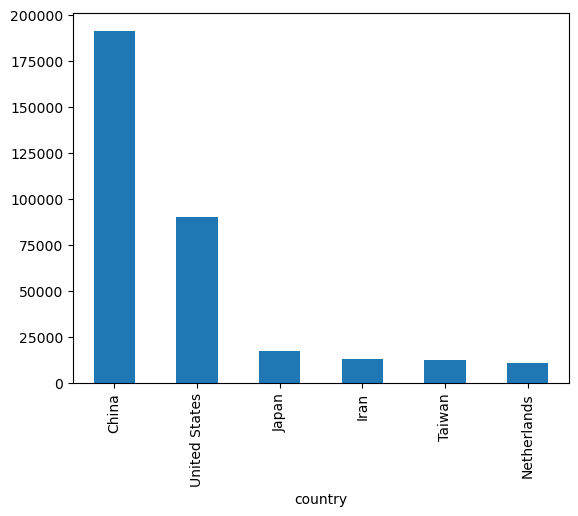

In [7]:
country_type_counts = df["country"].value_counts()
country_type_counts.nlargest(6).plot.bar()

Country Type Bar Graph Observations:
- The three countries with the most intrusion attempts are
    - China
    - United States 
    - Japan 

In [8]:
country_date = df.groupby(["country", "datetime"]).sum()

Observing dates of intrusions grouped by country 
- Sets up framework to allow us to view individual countries and their respective dates of intrusion attempts  

In [9]:
china_date = country_date.loc["China"]

<Axes: xlabel='locale'>

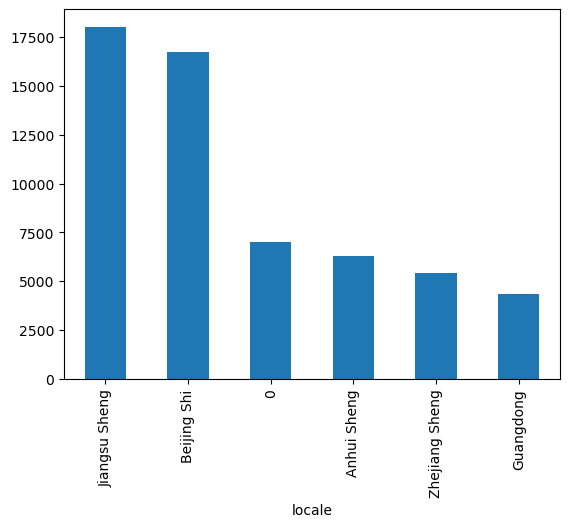

In [10]:
china_date_chart = china_date["locale"].value_counts()
china_date_chart.nlargest(6).plot.bar()

In [11]:
us_date = country_date.loc["United States"]

<Axes: xlabel='locale'>

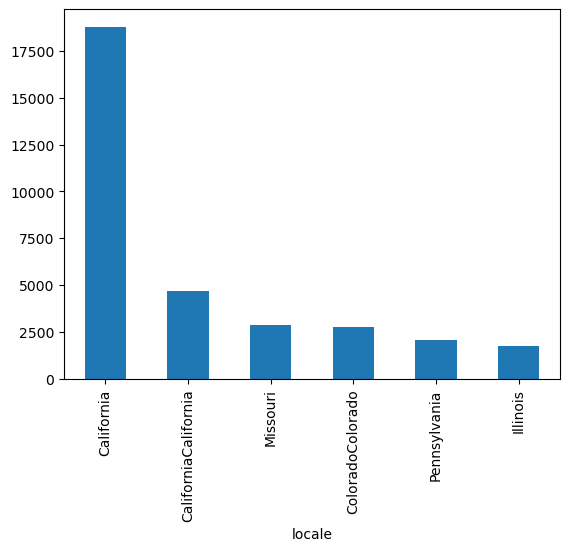

In [12]:
us_date_chart = us_date["locale"].value_counts()
us_date_chart.nlargest(6).plot.bar()

Potential error: Naming conventions are not standard, will need to address in wrangling 

In [13]:
df.groupby('spt')['cc'].count().sort_values(ascending = False)

spt
6000.0     154106
25416.0     18195
10100.0     11116
4445.0       4716
43825.0      2884
            ...  
6823.0          0
6821.0          0
8749.0          0
9865.0          0
64643.0         0
Name: cc, Length: 46188, dtype: int64

The Main source ports used for intrusion attempts:
- 6000.0     
- 25416.0     
- 10100.0     

### Date Time Exploration 
- This section will be looking at intrusion attempts by date and time 

In [14]:
#Resetting Index to Datetime
df["datetime"] = pd.to_datetime(df["datetime"])
df.set_index("datetime", inplace=True)

/var/folders/4s/dmr9y8dn2sqdy8fkqfmhmw0c0000gn/T/ipykernel_21639/809510608.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["datetime"] = pd.to_datetime(df["datetime"])


In [15]:
#Reorganizing data to look at SPT one month at a time
OneMonth = df.resample("1M")["spt"].value_counts()

<Axes: ylabel='datetime,spt'>

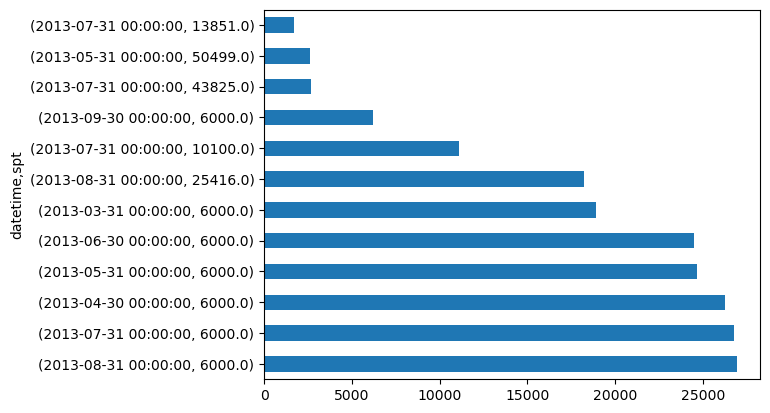

In [16]:
OneMonth.nlargest(12).plot.barh()

Observations from month analysis of intrusion attempts, the months and ports with most intrusions were:
- August 
- July 
- April 

Note: Majority of intrusions occurred on spt 6000

In [17]:
#intrusions by datetime, looking into countries 
OneMonthCountry = df.resample("1M")["country"].value_counts()

<Axes: ylabel='datetime,country'>

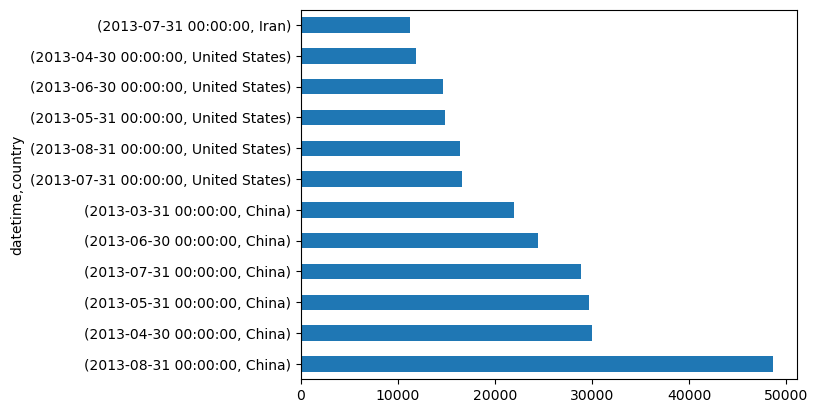

In [18]:
OneMonthCountry.nlargest(12).plot.barh()

Observations: 
- Most intrusion attempts came from Chine in August, April, and May

In [19]:
#looking at hack attempts by locale and time
OneMonthLocale = df.resample("1M")["locale"].value_counts()

<Axes: ylabel='datetime,locale'>

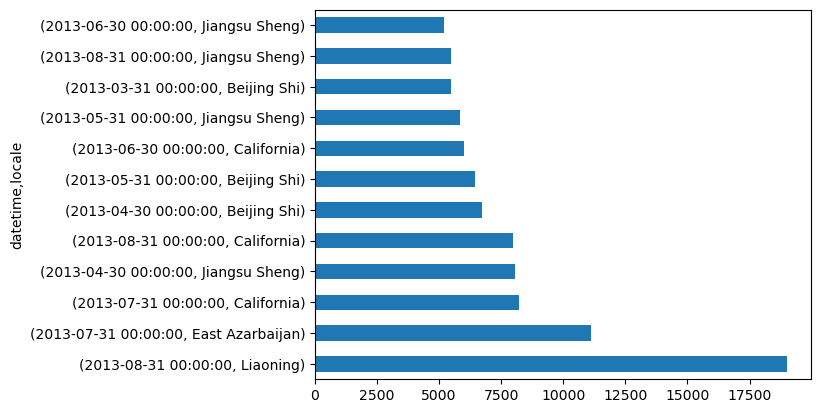

In [20]:
OneMonthLocale.nlargest(12).plot.barh()

Observations: 
- The three locales with most intrusion attempts were Liaoning, East Azarbaijan, and California

### Date Time Exploration Continuation, looking at our dataset through the different dates
- Helper Function & Data Manipulation
    - Helper functions to change the data format.

In [21]:
df = pd.read_csv("../data/raw/AWS_Honeypot_marx-geo.csv")

In [22]:
import datetime

def strip_datetime(date):
    """
    Helper function to strip datetime column into components
    """
    return datetime.datetime.strptime(date, "%m/%d/%y %H:%M")

In [23]:
df['date_stripped'] = df['datetime'].apply(strip_datetime)

In [24]:
def get_date(date):
    """
    Helper function to get date without time for easier grouping
    """
    return date.date()#.strftime('%d %b %Y')

In [25]:
df['date_1'] = df['date_stripped'].apply(get_date)

In [26]:
df['month'] = df['date_1'].apply(lambda x: x.month)

In [27]:
import math


Plot of the number of attacks per day for each day in the dataset. The plots are grouped by different months. The goal here was to try and see if certain days had more attacks which we did find peak. But could not find any correlations between those peaks and current events in the world. 

#### Observations: Timeline of Attacks

From the graphs below we see the timeline of the number of attacks. We can see that in some months for some days there are peaks where there are a more than usual number of attacks. For example 3/18/23, 7/24/23, 8/26/23 and 8/27/23 are all spikes where there are more attacks than usual. 

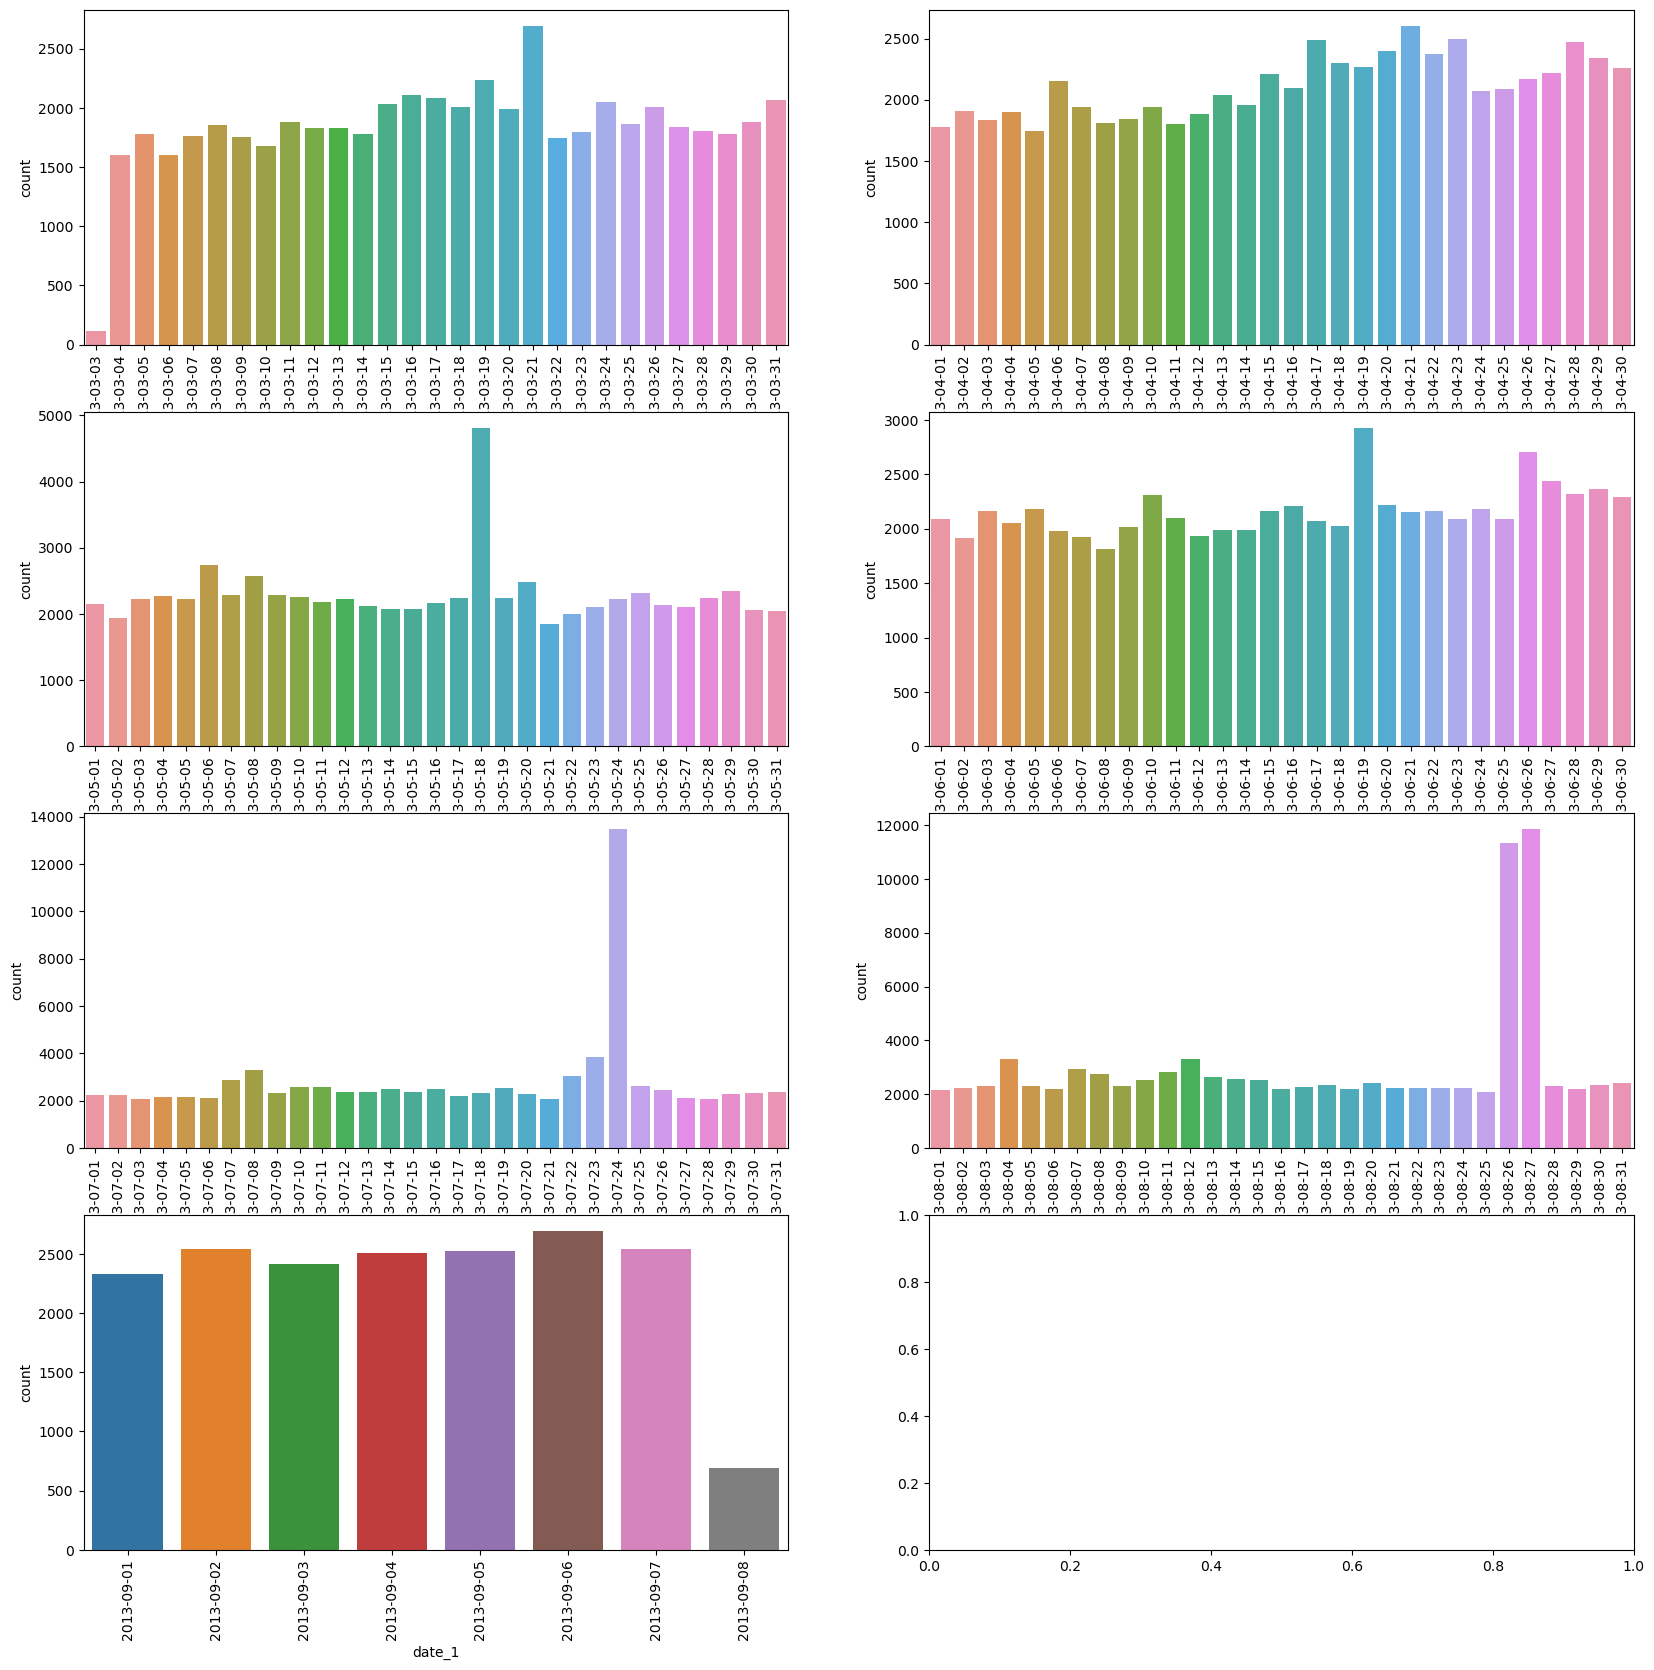

In [28]:
fig, axs = plt.subplots(4, 2)
fig.set_size_inches(20, 20)

max_by_month = []

count = 0
for month, group in df.groupby('month'):
    max_by_month.append(group['date_1'].mode()[0])
    if count == 0:
        x, y = 0, 0
    else:
        x, y = math.floor(count / 2), count % 2
    axs[x, y].tick_params(axis='x', rotation=90)
    sns.countplot(x='date_1', data=group, ax=axs[x, y])
    count += 1

### Source of Hacking Attempts Analysis 
Whilst looking at the peak dates where there are more than usual attacks we noticed that in most of these days the attacks are more so coming from one source rather than an influx of different people hacking at the same time. This is very interesting and sort of counterintuitive so it would be worthwile to get a better look at individual hackers rather than dates to try and find some reasons as to why they are hacking. 

#### Focusing On The Top 10 Hackers of Our Honey Pot

This part of the analysis is going to focus more on the source of attacks rather than the actual dates of attacks. 

<Axes: xlabel='srcstr'>

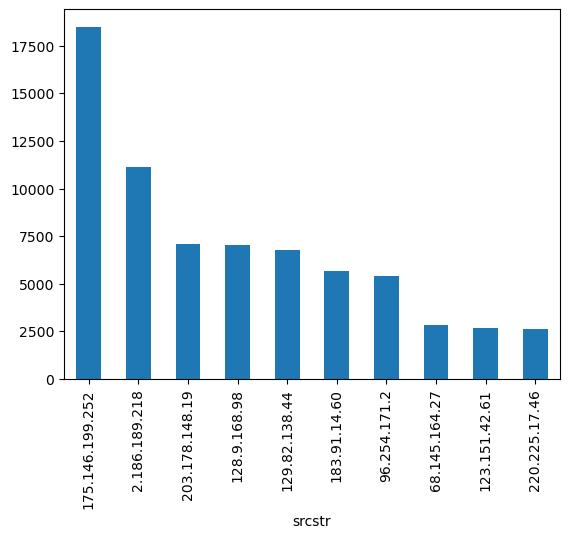

In [29]:
df['srcstr'].value_counts().head(10).plot(kind='bar')

In [30]:
top_ten_src = list(df['srcstr'].value_counts().head(10).index)

In [31]:
ten_src_df = df[df['srcstr'].isin(top_ten_src)]

In [32]:
ten_src_df['day_hour'] = ten_src_df['date_stripped'].apply(lambda x: (x.day, x.hour))

/var/folders/4s/dmr9y8dn2sqdy8fkqfmhmw0c0000gn/T/ipykernel_21639/957809360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ten_src_df['day_hour'] = ten_src_df['date_stripped'].apply(lambda x: (x.day, x.hour))


Plots for the top then src attackers in our honeypot dataset. There are two different patterns either big attacks in a small amount of time span vs sporadic attack patterns with certain peaks. 

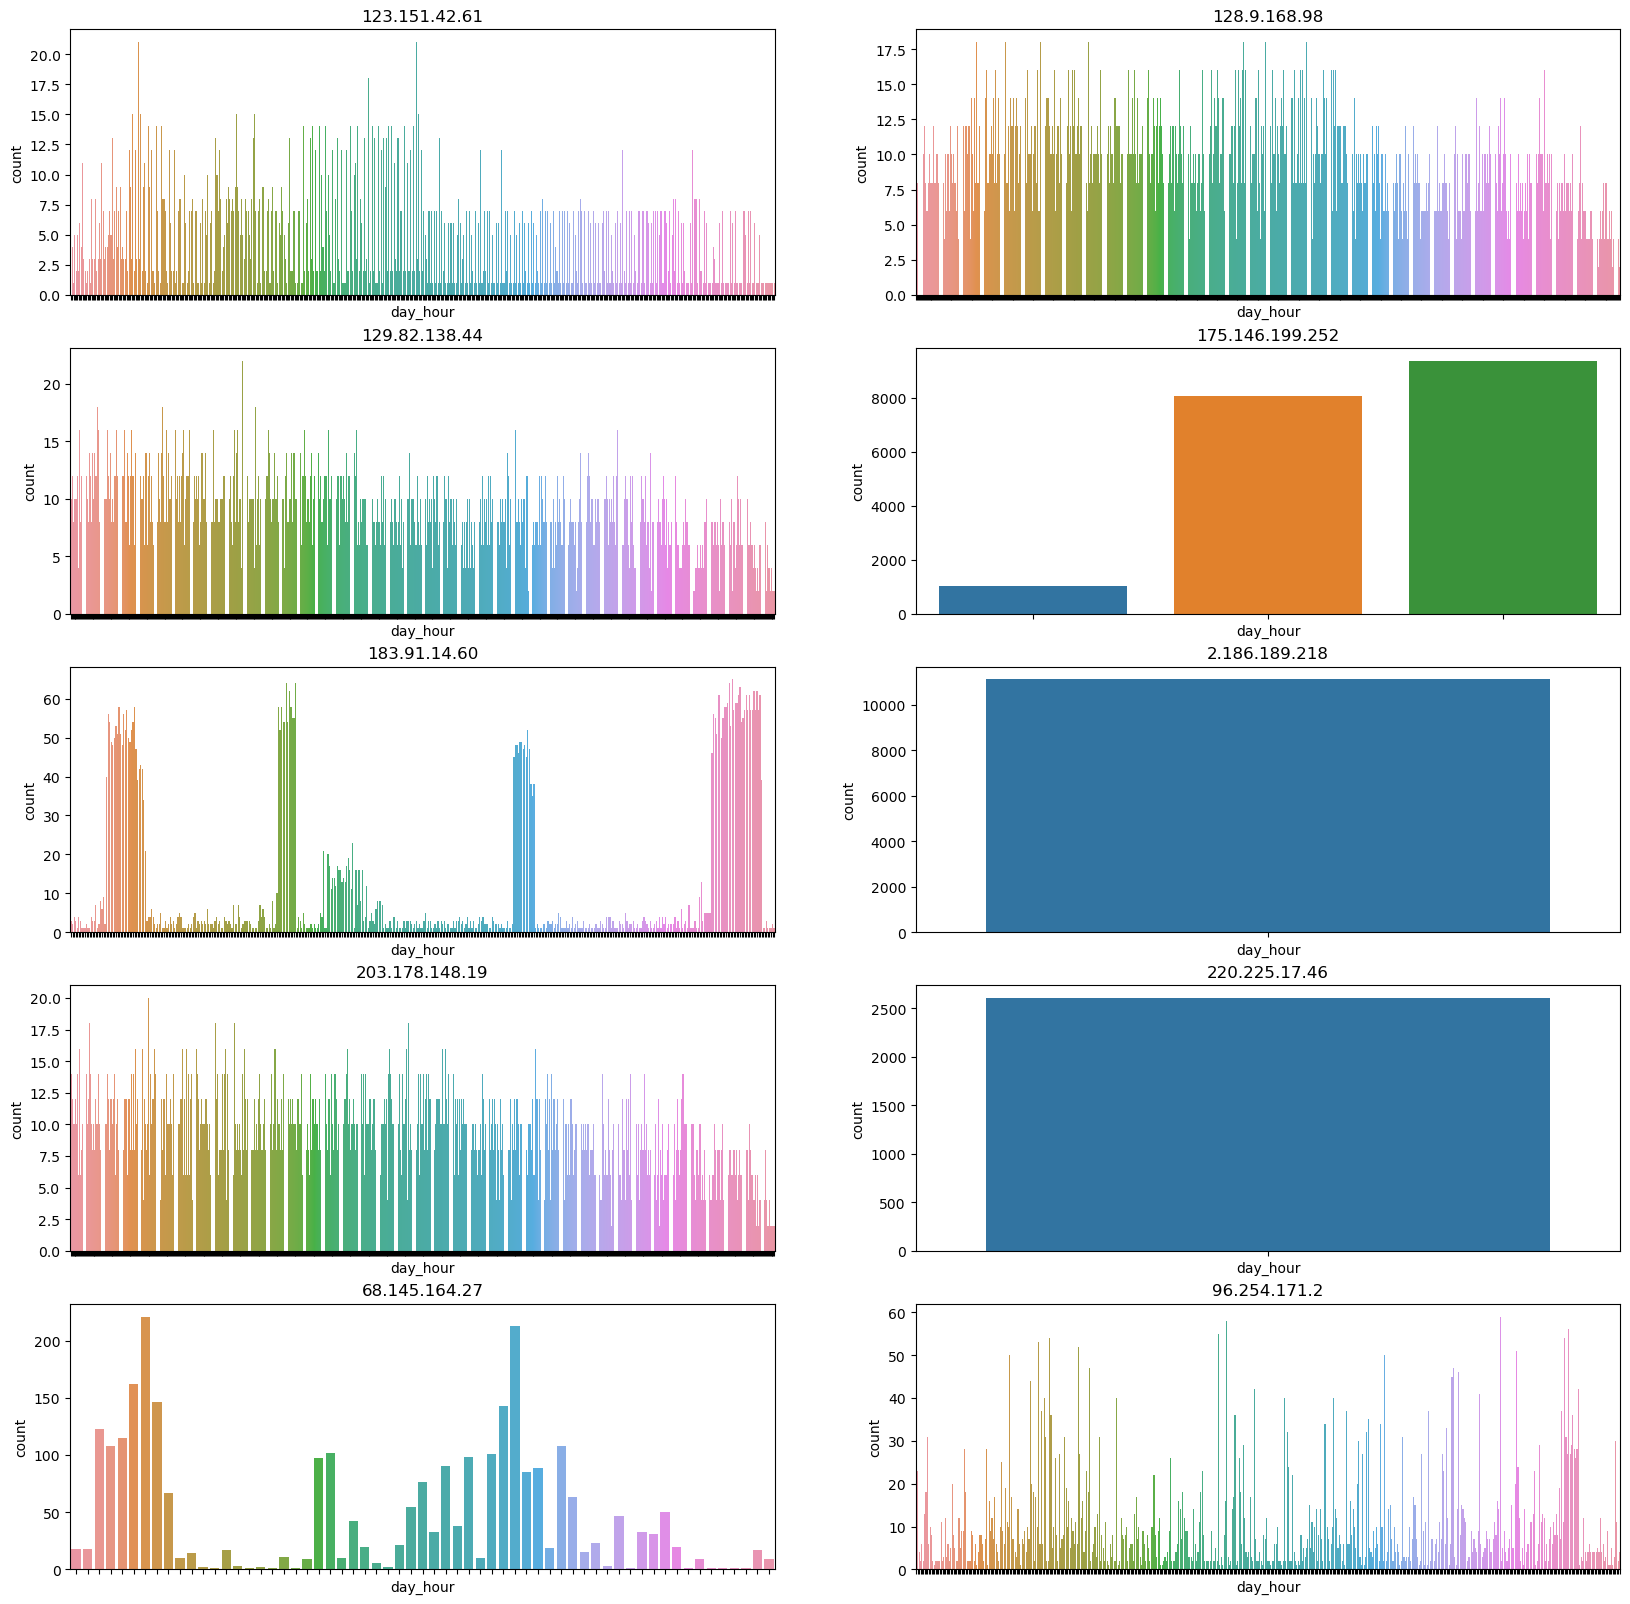

In [33]:
fig, axs = plt.subplots(5, 2)
fig.set_size_inches(20, 20)

count = 0
for srcstr, group in ten_src_df.groupby('srcstr'):
    if count == 0:
        x, y = 0, 0
    else:
        x, y = math.floor(count / 2), count % 2
    plt.setp(axs[x, y].get_xticklabels(), visible=False)
    axs[x, y].title.set_text(srcstr)
    sns.countplot(x='day_hour', data=group, ax=axs[x, y])
    count += 1

Observations:
As we can see from the graphs above we can distinguish hackers into two different groups in terms of their patterns of attack.
- Group 1: The first hacker is the one that hacks over a long period of time and usually has a pattern. This hacker will have peaks where they hack more than usual but are more consistent in terms of hacking. 
- Group 2: On the other hand we have a hacker that hacks over a short period of time usually doing all his hacking in a matter of a couple of hours. These hackers have thousands of attempts in a short period of time and are never seen again.

#### Hacking By Host

In the following graphs we take a look at hacking patterns by host location. We can see that most hosts follow the same patterns having different peaks on different days. 

In [34]:
df['day_hour'] = df['date_stripped'].apply(lambda x: (x.day, x.hour))

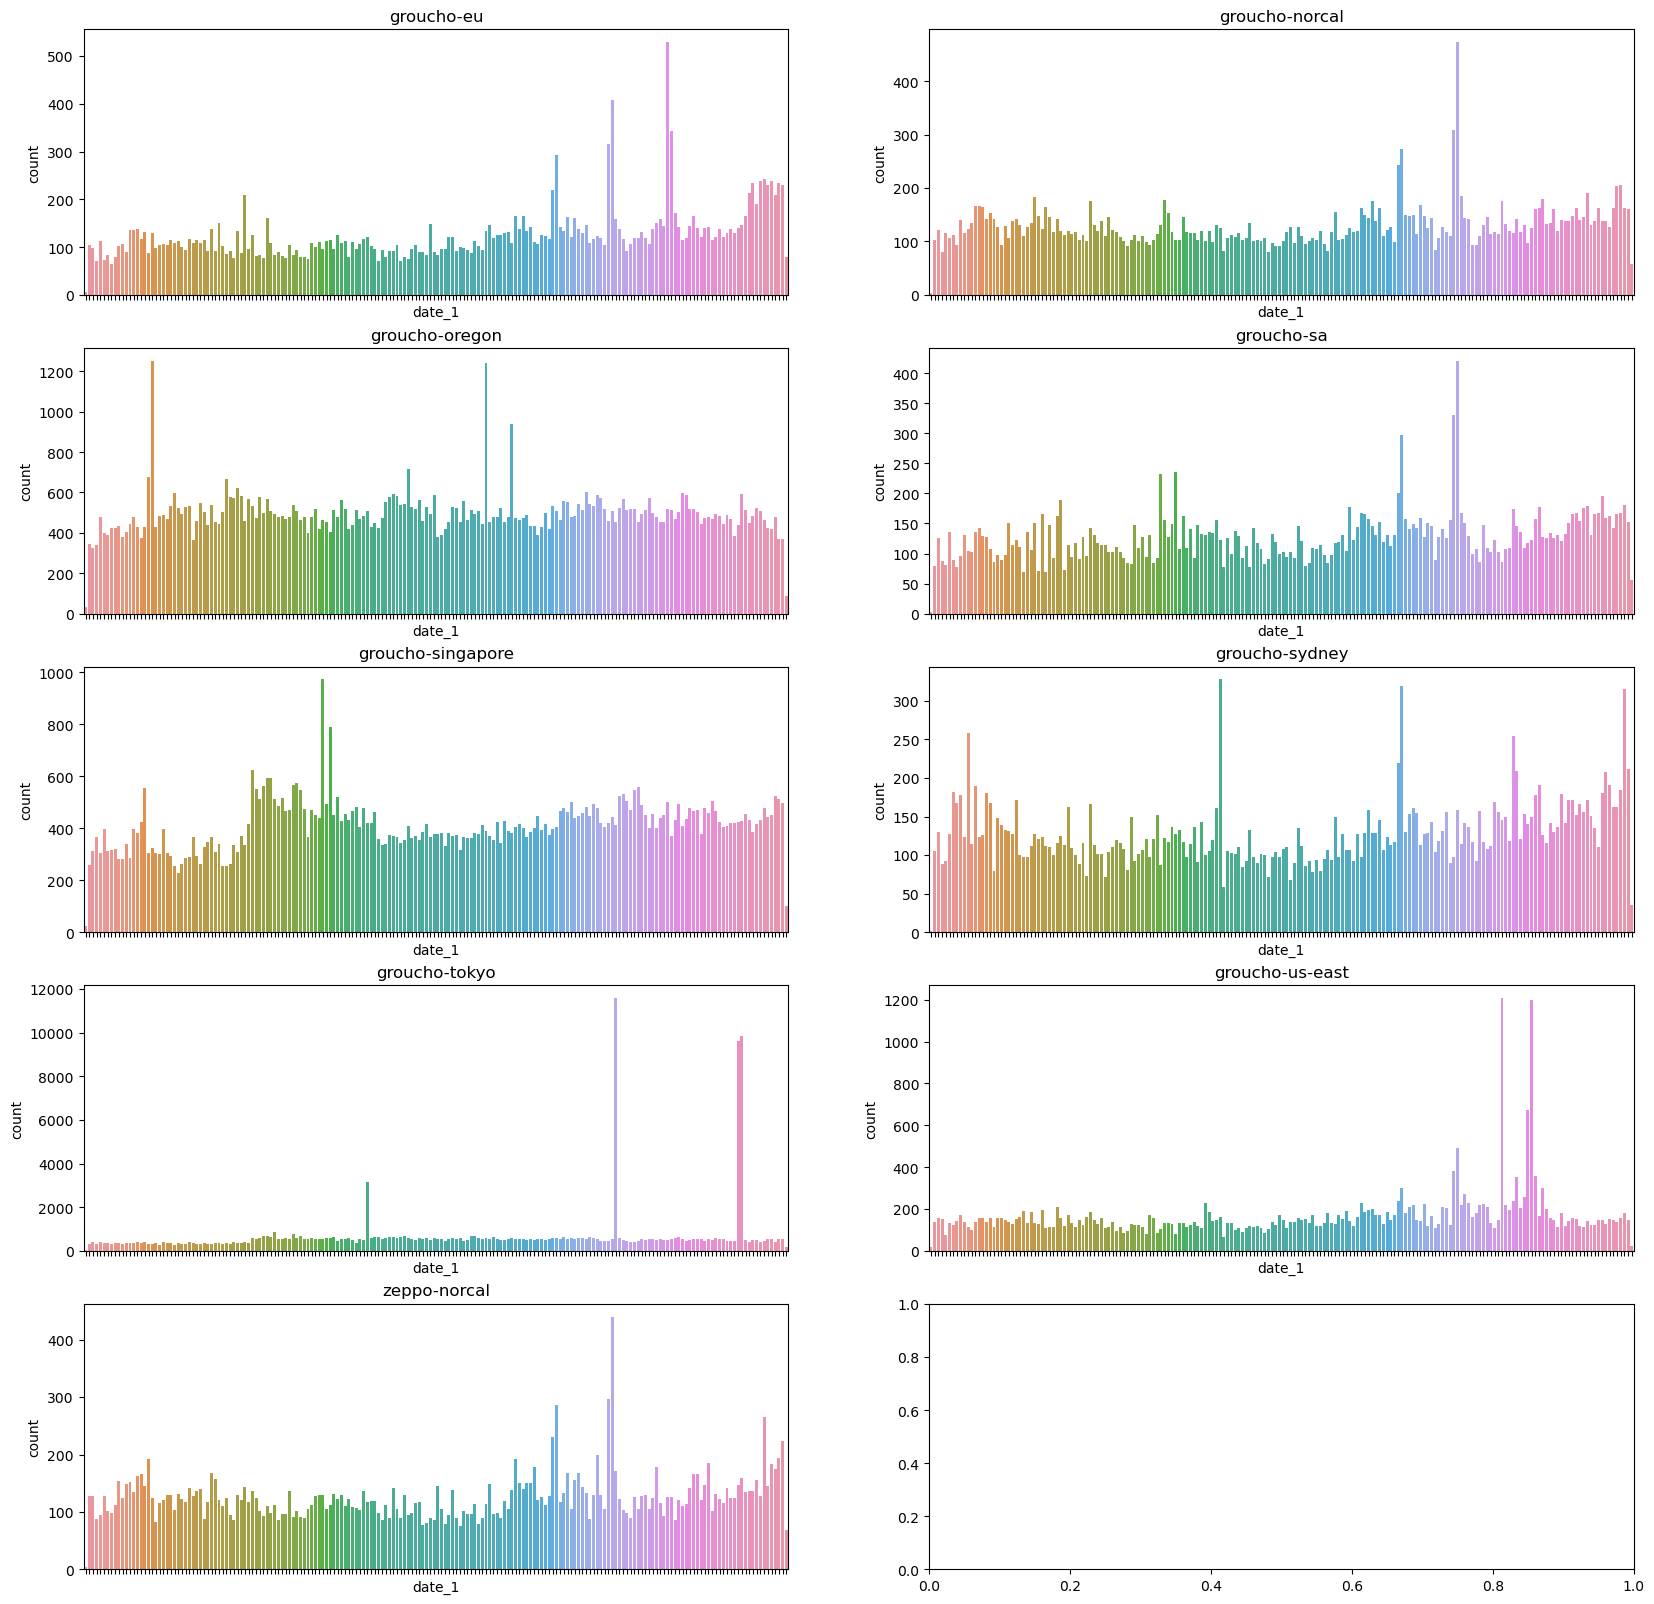

In [35]:
fig, axs = plt.subplots(5, 2)
fig.set_size_inches(20, 20)

count = 0
for host, group in df.groupby('host'):
    if count == 0:
        x, y = 0, 0
    else:
        x, y = math.floor(count / 2), count % 2
    plt.setp(axs[x, y].get_xticklabels(), visible=False)
    axs[x, y].title.set_text(host)
    sns.countplot(x='date_1', data=group, ax=axs[x, y])
    count += 1

Observation: 
- Explored potential correlation with peak dates of hacking activities and cross-referenced with world events. No additional details found after exploring the peak dates.

Looking at protocols by top 5 countries: 

In [36]:
test = df['country'].value_counts().head(5).index

In [37]:
top_5_largest = df[df['country'].isin(test)]

<Axes: xlabel='country', ylabel='Count'>

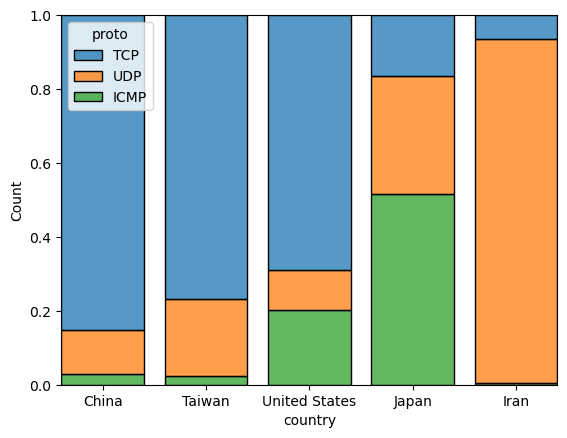

In [38]:
sns.histplot(
    data=top_5_largest,
    x="country", hue="proto",
    multiple="fill", stat="count",
    discrete=True, shrink=.8
)

In [39]:
df.head()

,datetime,host,src,proto,type,spt,dpt,srcstr,cc,country,locale,localeabbr,postalcode,latitude,longitude,Unnamed: 15,date_stripped,date_1,month,day_hour
0,3/3/13 21:53,groucho-oregon,1032051418,TCP,NaN,6000.0,1433.0,61.131.218.218,CN,China,Jiangxi Sheng,36,NaN,28.5500,115.9333,NaN,2013-03-03 21:53:00,2013-03-03,3,"(3, 21)"
1,3/3/13 21:57,groucho-oregon,1347834426,UDP,NaN,5270.0,5060.0,80.86.82.58,DE,Germany,NaN,NaN,NaN,51.0000,9.0000,NaN,2013-03-03 21:57:00,2013-03-03,3,"(3, 21)"
2,3/3/13 21:58,groucho-oregon,2947856490,TCP,NaN,2489.0,1080.0,175.180.184.106,TW,Taiwan,Taipei,NaN,NaN,25.0392,121.5250,NaN,2013-03-03 21:58:00,2013-03-03,3,"(3, 21)"
3,3/3/13 21:58,groucho-us-east,841842716,UDP,NaN,43235.0,1900.0,50.45.128.28,US,United States,Oregon,OR,97124,45.5848,-122.9117,NaN,2013-03-03 21:58:00,2013-03-03,3,"(3, 21)"
4,3/3/13 21:58,groucho-singapore,3587648279,TCP,NaN,56577.0,80.0,213.215.43.23,FR,France,NaN,NaN,NaN,48.8600,2.3500,NaN,2013-03-03 21:58:00,2013-03-03,3,"(3, 21)"


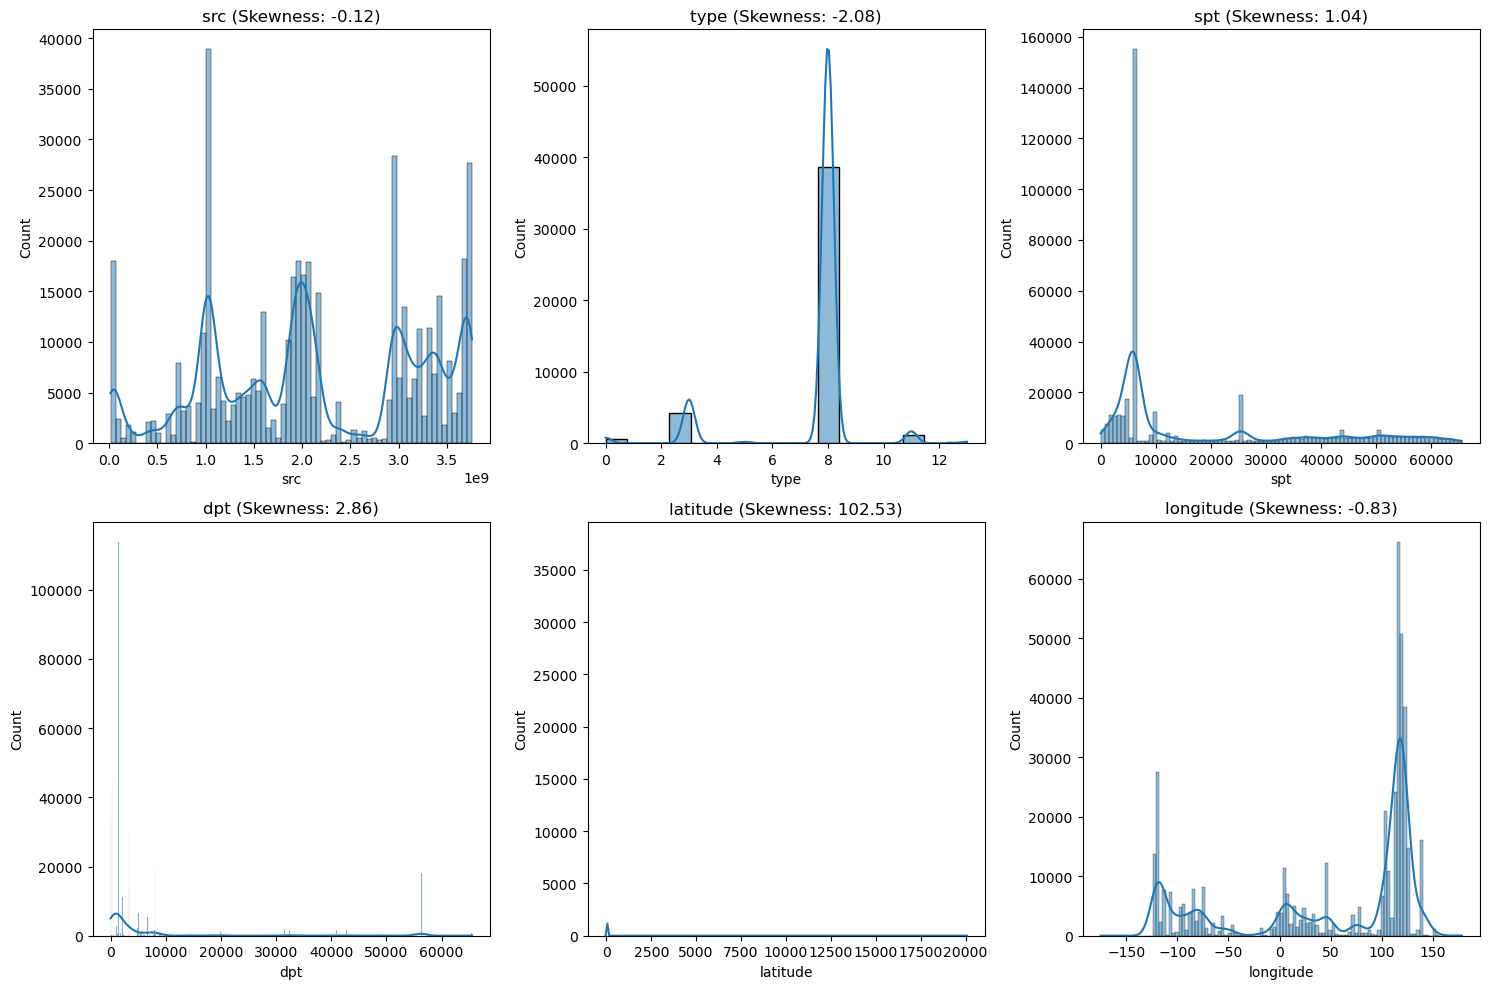

src           -0.118986
type          -2.081333
spt            1.037120
dpt            2.859764
latitude     102.531502
longitude     -0.831200
dtype: float64

In [40]:
# Calculating the skewness of each feature
to_drop = ['datetime', "host", "proto", "srcstr","cc","country","locale", "localeabbr", "postalcode", "Unnamed: 15", "date_stripped", "date_1", "day_hour", "month"]
other_columns = df.drop(to_drop, axis=1).columns
feature_skewness = df[other_columns].skew()

# Plotting histograms for each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(other_columns, 1):  # Excluding the target variable
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'{column} (Skewness: {feature_skewness[column]:.2f})')

plt.tight_layout()
plt.show()

feature_skewness

##### Observations from Skewness of each feature
- src (-0.118986) - Almost normally distributed, slight negative skew on left
- type (-2.081333) - Left skewed
- spt (1.037120) - Slight Right Skew
- dpt (2.859764) - Slight Right Skew
- latitude (102.531502) - Right Skewed 
- longitude (-0.831200) - Almost normally distributed, slight negative skew to the left

#### Bivariate Analysis 

<Axes: >

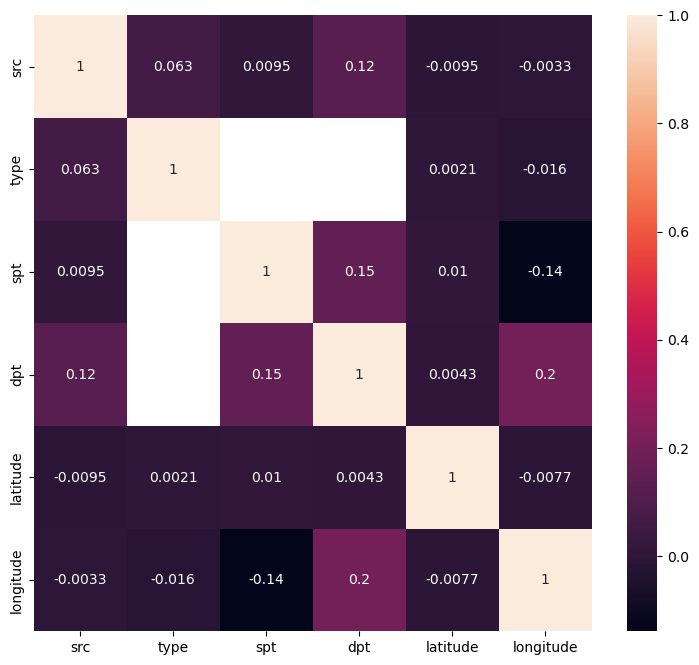

In [41]:
#heatmap for feature correlation evaluation 

selected_col = ["src", "type", "spt", "dpt", "latitude", "longitude"]

plt.figure(figsize=(9,8))

sns.heatmap(df[selected_col].corr(), annot=True)

##### Observations Heatmap
- There do not seem to be features that are highly correlated. This is an indicator that the features will be independent, something that we want for building out our models. 

### Project MVP EDA Write Up
Details on MVP EDA pipeline
- Part of cleaning our dataset will include addressing the missing values
- Missing values found in our dataset: 
- Shape of dataset: 451581 rows × 16 columns
- Need to address missing values in following columns:
    - type           (406770) : Potential Drop, too many missing values 
    - spt             (44811)
    - dpt             (44811)
    - cc               (3596)
    - country          (3634)
    - locale         (109469) 1/4th missing data for locale
    - localeabbr     (119876)
    - postalcode     (365103): Majority postal code missing - potential drop
    - latitude         (3469): Setting NA to zero?
    - longitude        (3428): Setting NA to zero? 
- From our bivariate analysis, we did not identify columns with high correlation which indicates that our features are independent when we build our model later on.
- From our univiriate analysis of the countries, locales, and protocols, we identified the top 5 for each of those columns. This will inform which areas we focus on when further looking into where most of these hack attempts come from. 

Details on planned data transformations given EDA outputs
- We changed the datetime column from a string to an actual date-time object using helper functions, this will allow us to further use this column for additional analysis using time.
- We dissected the datetime object into different components (month, day, etc.) for deeper analysis
- Changed the index for our dataset to facilitate the analysis into the date-time aspect of our intrusion attempts 

Set up database/datastore 
- This EDA was based of our toy dataset from a Kaggle honeypot to start to develop our EDA process. Our data from our deployed honeypot is still being collected and will be added as S3 bucket on AWS. 

Based on the process we completed with the EDA and this toy dataset, it will inform our process in tackling our actual data addressing things like missing values, data type formatting, and understanding of trends within specific columns related to intrusion attempts. 
